<a href="https://colab.research.google.com/github/NARAYANAN0101/DEEP-LEARNING/blob/main/final_object_detetction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics opencv-python tqdm matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.3 MB/s eta 0:00:00


In [2]:
import zipfile
import os

zip_path = "/content/archive(4).zip"
extract_path = "dataset_01"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped dataset to:", extract_path)


Unzipped dataset to: dataset_01


In [8]:
import os

os.makedirs("/content/dataset_01", exist_ok=True)

dataset_yaml = """\
train: /content/dataset_01/train
val: /content/dataset_01/valid

nc: 12  # Number of classes
names: ['ANTS', 'BEES', 'BEETLE', 'CATTERPILLAR', 'EARTHWORMS', 'EARWIG', 'GRASSHOPPER', 'MOTH', 'SLUG', 'SNAIL', 'WASP', 'WEEVIL']
"""

with open("/content/dataset_01/data.yaml", "w") as f:
    f.write(dataset_yaml)

print("Clean YAML created at /content/dataset_01/data.yaml")



Clean YAML created at /content/dataset_01/data.yaml


In [9]:
import yaml
yaml.safe_load(open("/content/dataset_01/data.yaml"))
print("YAML syntax is valid ✅")


YAML syntax is valid ✅


In [10]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="/content/dataset_01/data.yaml", epochs=50, imgsz=640, batch=16)


Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_01/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a0c9baa7bf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [16]:
from ultralytics import YOLO

# Load best weights from training
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Run prediction on a new image
results = model.predict(
    source="/content/insect.jpeg",  # path to your image
    conf=0.25,                # confidence threshold
    save=True   # save results to 'runs/predict'
)


image 1/1 /content/insect.jpeg: 640x512 1 BEETLE, 40.1ms
Speed: 2.2ms preprocess, 40.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/runs/detect/predict3


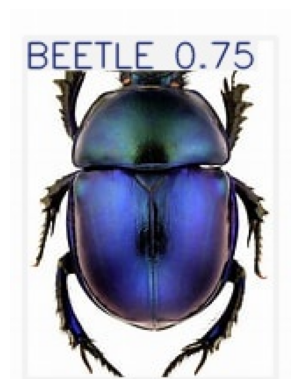

In [17]:
import cv2
import matplotlib.pyplot as plt
import glob
import os

# Assuming the predicted image is saved in the predict directory
predict_dir = results[0].save_dir
# Find the first JPG file in the predict directory
result_img_path = glob.glob(os.path.join(predict_dir, "*.jpg"))[0]

img = cv2.imread(str(result_img_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()